# Jun 8th, 2022 (plot pi together for all: KABA 128)

**Motivation**: final: $k=4, 7$ mg + $k=10, 14$  <br>

In [1]:
# HIDE CODE


import os
import sys
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from scipy.ndimage import gaussian_filter
from IPython.display import display, IFrame, HTML

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
fig_base_dir = pjoin(git_dir, 'jb-Ca-fMRI/figs')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')

# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from model.configuration import Config
from model.mouse import Mice
from analysis.group import *
from utils.render import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from tqdm.notebook import tqdm
%matplotlib inline
set_style()

## Prepare

In [2]:
mice = Mice(128)

mako = sns.color_palette('mako', as_cmap=True)
rocket = sns.color_palette('rocket', as_cmap=True)
pal = {'ca2': mako(0.6), 'bold-lite': rocket(0.6)}

In [3]:
task = 'rest'
b = (0.01, 0.5)
mice.setup_func_data(task, band_ca=b)

num_k, p = None, 20
perc = f'p{p}-sample'
props_base = {
    'kw_kmeans': {'n_init': 100},
    'perc': perc,
    'num_k': num_k,
    'mice': mice,
    'task': task,
    'metric': 'pearson',
    'match_using': 'gam',
    'match_metric': 'euclidean',
    'graph_type': 'real',
    'verbose': False,
}
props_ca = {'mode': 'ca2', **props_base}
props_bo = {'mode': 'bold-lite', **props_base}

### Ca2

In [4]:
%%time

pi_avg = {}
pi_all = {}
for kk in tqdm(range(4, 15, 1)):
    props_ca['num_k'] = kk
    gr_ca = Group(**props_ca).fit_group()
    pi_ca = gr_ca.prune(thres=0.003, ci=0.95)['pi_prune']
    pi_all[kk] = pi_ca
    pi_avg[f'ca2-k{kk}(pr95)\nb={b}'.replace(' ', '')] = avg(pi_ca)
    
# sort
d2p_cas = pi_avg.copy()
for i in range(len(pi_avg)):
    lbl, x = list(pi_avg.items())[i]
    if i == 0:
        continue
    src = list(d2p_cas.values())[i - 1]
    gmap = find_best_mappings(
        centroids=src,
        data={0: x},
        match_metric='cosine',
        global_order='infer',
    )[0]
    ids = list(gmap.values())
    ids = ids + list(np.delete(range(len(x)), ids))
    d2p_cas[lbl] = x[ids]

  0%|          | 0/11 [00:00<?, ?it/s]

CPU times: user 8h 58min 56s, sys: 13min 8s, total: 9h 12min 5s
Wall time: 18min 57s


In [5]:
gr_ca.fit_meta

{
    'time_start': '2022_06_06_12-26',
    'min_runs_thresh': 0.6,
    'min_node_thresh': 0.7,
    'best_node_freq_q': 0.93,
    'num_total_runs': 110,
    'fraction_accepted_runs': 0.6727272727272727,
    'fraction_good_nodes': 0.7368421052631579,
    'time_end': '2022_06_06_12-29'
}

In [6]:
gr_ca.kw_kmeans

{'n_init': 100, 'max_iter': 300, 'tol': 0.0001}

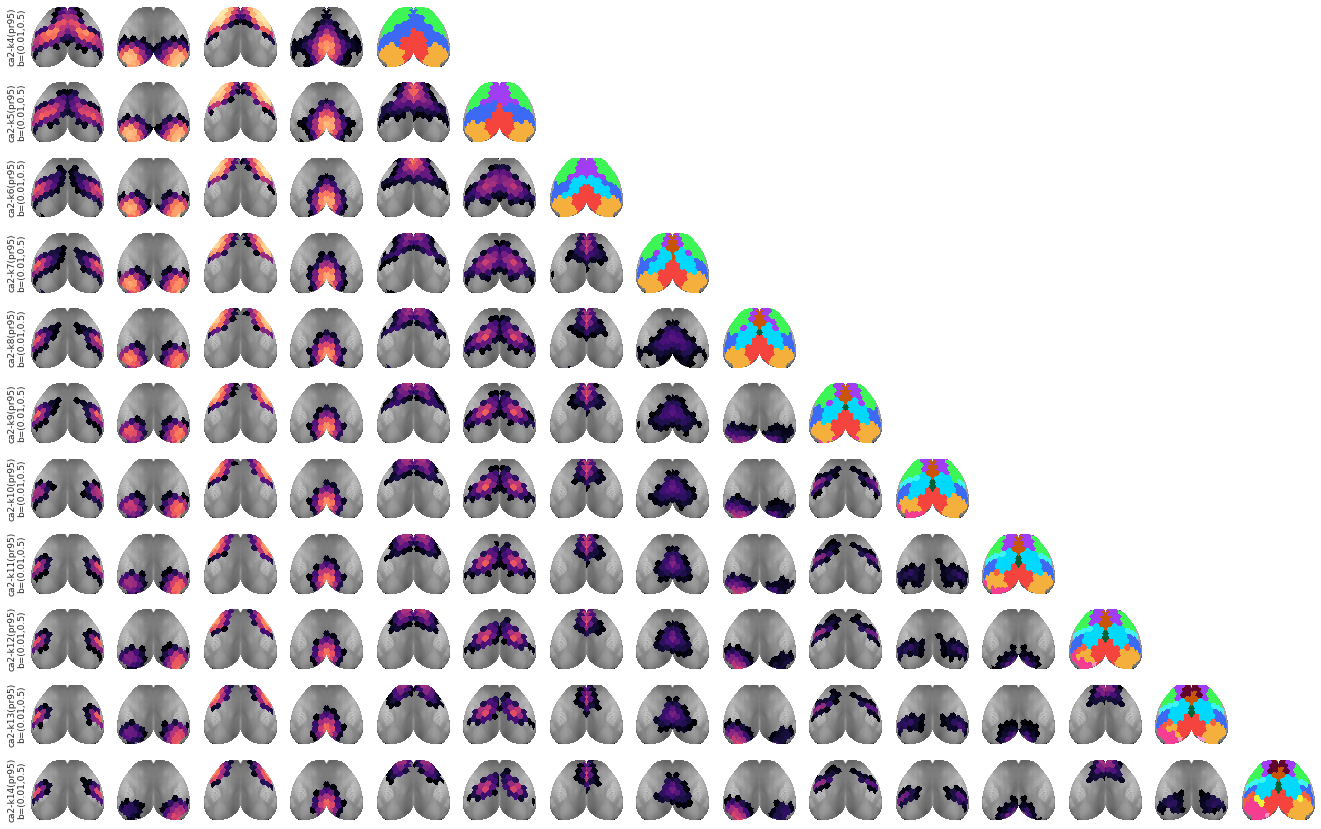

In [8]:
_ = gr_ca.show(d2p_cas, figsize=(23, 15))

In [9]:
h_all = []
for kk, x in pi_all.items():
    h = sp_stats.entropy(bn.nanmean(x, -3), axis=-2) / np.log(x.shape[-2])
    h_all.append(np.expand_dims(h, 0))
h_all = np.concatenate(h_all)
h_avg = avg(h_all, 1, 1)

h_all.shape, h_avg.shape

((11, 10, 3, 4, 152), (11, 152))

In [10]:
np.nanmin(h_avg), np.nanmax(h_avg)

(0.06061408157035186, 0.7033656248943743)

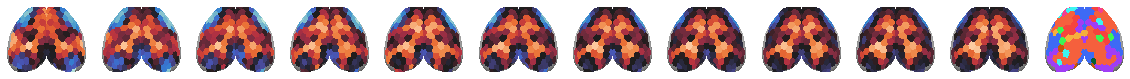

In [11]:
_ = gr_ca.show(
    h_avg,
    vmin=np.nanmin(h_avg),
    vmax=np.nanmax(h_avg),
    figsize=(20, 4),
    cmap='icefire',
)

In [12]:
sim_h = dist2sim(sp_dist.squareform(sp_dist.pdist(
    h_avg, metric='correlation')))

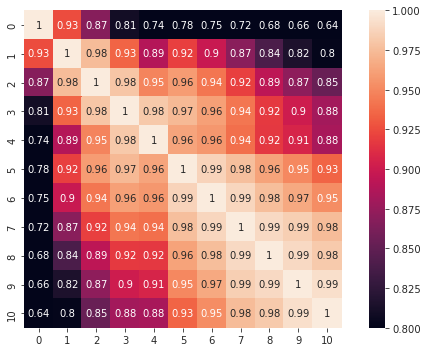

In [13]:
fig, ax = create_figure(1, 1, (8, 5))

sns.heatmap(
    sim_h,
    vmin=0.8,
    vmax=1.0,
    square=True,
    annot=True,
    fmt='.2g',
    ax=ax,
)
plt.show()

### Ca2 (fast)

In [14]:
b = 0.5
mice.setup_func_data(task, band_ca=b)

In [15]:
pi_avg = {}
pi_all = {}
for kk in tqdm(range(4, 15, 1)):
    props_ca['num_k'] = kk
    gr_ca = Group(**props_ca).fit_group()
    pi_ca = gr_ca.prune(thres=0.003, ci=0.95)['pi_prune']
    pi_all[kk] = pi_ca
    pi_avg[f'ca2-k{kk}(pr95)\nb={b}'.replace(' ', '')] = avg(pi_ca)
    
# sort
d2p_caf = pi_avg.copy()
for i in range(len(pi_avg)):
    lbl, x = list(pi_avg.items())[i]
    if i == 0:
        continue
    src = list(d2p_caf.values())[i - 1]
    gmap = find_best_mappings(
        centroids=src,
        data={0: x},
        match_metric='cosine',
        global_order='infer',
    )[0]
    ids = list(gmap.values())
    ids = ids + list(np.delete(range(len(x)), ids))
    d2p_caf[lbl] = x[ids]

  0%|          | 0/11 [00:00<?, ?it/s]

In [16]:
gr_ca.fit_meta

{
    'time_start': '2022_06_06_12-29',
    'min_runs_thresh': 0.6,
    'min_node_thresh': 0.5699999999999998,
    'best_node_freq_q': 0.885,
    'num_total_runs': 110,
    'fraction_accepted_runs': 0.6363636363636364,
    'fraction_good_nodes': 0.5789473684210527,
    'time_end': '2022_06_06_12-32'
}

In [17]:
gr_ca.kw_kmeans

{'n_init': 100, 'max_iter': 300, 'tol': 0.0001}

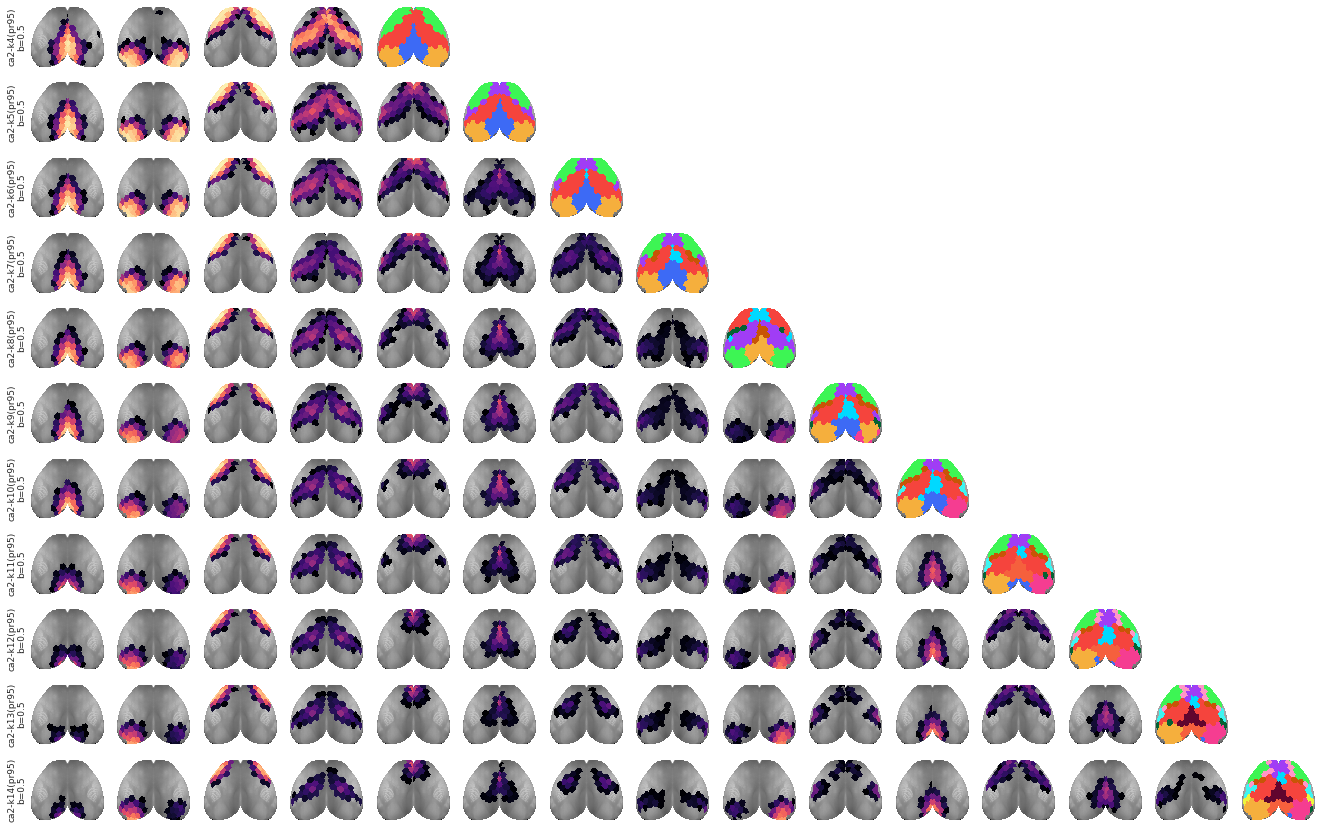

In [18]:
_ = gr_ca.show(d2p_caf, figsize=(23, 15))

In [19]:
h_all = []
for kk, x in pi_all.items():
    h = sp_stats.entropy(bn.nanmean(x, -3), axis=-2) / np.log(x.shape[-2])
    h_all.append(np.expand_dims(h, 0))
h_all = np.concatenate(h_all)
h_avg = avg(h_all, 1, 1)

h_all.shape, h_avg.shape

((11, 10, 3, 4, 152), (11, 152))

In [20]:
np.nanmin(h_avg), np.nanmax(h_avg)

(0.031736745011281646, 0.815690086850833)

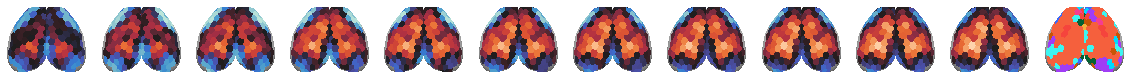

In [21]:
_ = gr_ca.show(
    h_avg,
    vmin=np.nanmin(h_avg),
    vmax=np.nanmax(h_avg),
    figsize=(20, 4),
    cmap='icefire',
)

In [22]:
sim_h = dist2sim(sp_dist.squareform(sp_dist.pdist(
    h_avg[:, np.isnan(h_avg).sum(0) == 0], metric='correlation')))

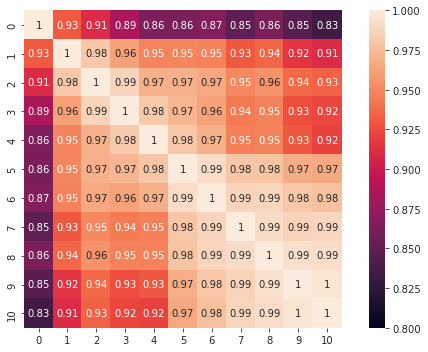

In [23]:
fig, ax = create_figure(1, 1, (8, 5))

sns.heatmap(
    sim_h,
    vmin=0.8,
    vmax=1.0,
    square=True,
    annot=True,
    fmt='.2g',
    ax=ax,
)
plt.show()

### Bold

In [25]:
pi_avg = {}
pi_all = {}
for kk in tqdm(range(4, 15)):
    props_bo['num_k'] = kk
    gr_bo = Group(**props_bo).fit_group()
    pi_bo = gr_bo.prune(thres=0.003, ci=0.95)['pi_prune']
    pi_all[kk] = pi_bo
    pi_avg[f'bo-k{kk}(pr95)\nb={b}'.replace(' ', '')] = avg(pi_bo)
    
# sort
d2p_bo = pi_avg.copy()
for i in range(len(pi_avg)):
    lbl, x = list(pi_avg.items())[i]
    if i == 0:
        continue
    src = list(d2p_bo.values())[i - 1]
    gmap = find_best_mappings(
        centroids=src,
        data={0: x},
        match_metric='cosine',
        global_order='infer',
    )[0]
    ids = list(gmap.values())
    ids = ids + list(np.delete(range(len(x)), ids))
    d2p_bo[lbl] = x[ids]

  0%|          | 0/11 [00:00<?, ?it/s]

In [26]:
gr_bo.fit_meta

{
    'time_start': '2022_06_04_12-32',
    'min_runs_thresh': 0.75,
    'min_node_thresh': 0.85,
    'best_node_freq_q': 0.985,
    'num_total_runs': 114,
    'fraction_accepted_runs': 0.8859649122807017,
    'fraction_good_nodes': 0.8618421052631579,
    'time_end': '2022_06_04_12-46'
}

In [27]:
gr_ca.kw_kmeans

{'n_init': 100, 'max_iter': 300, 'tol': 0.0001}

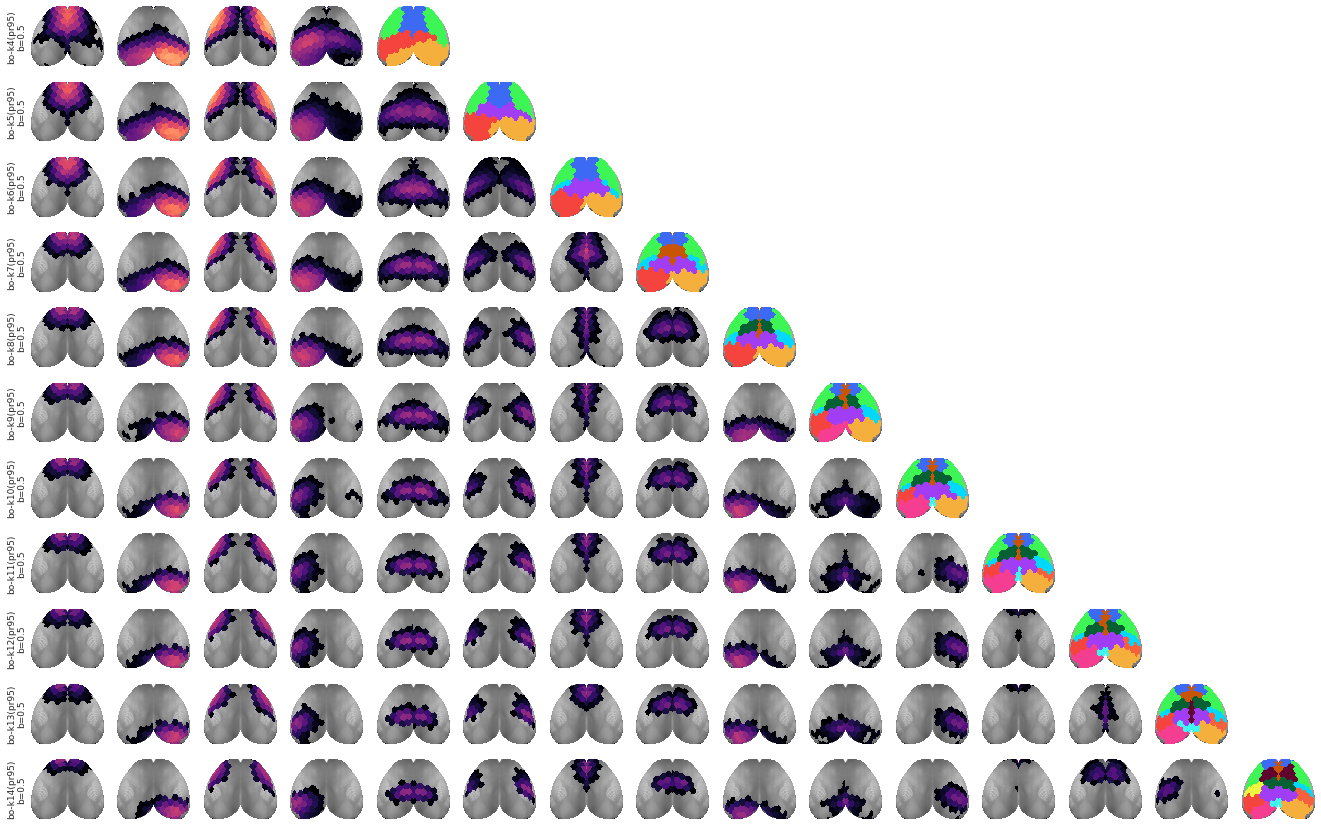

In [28]:
_ = gr_bo.show(d2p_bo, figsize=(23, 15))

In [29]:
h_all = []
for kk, x in pi_all.items():
    h = sp_stats.entropy(bn.nanmean(x, -3), axis=-2) / np.log(x.shape[-2])
    h_all.append(np.expand_dims(h, 0))
h_all = np.concatenate(h_all)
h_avg = avg(h_all, 1, 1)

h_all.shape, h_avg.shape

((11, 10, 3, 4, 152), (11, 152))

In [30]:
np.nanmin(h_avg), np.nanmax(h_avg)

(0.27331670476811226, 0.7710337355398118)

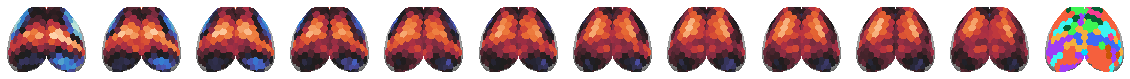

In [31]:
_ = gr_ca.show(
    h_avg,
    vmin=np.nanmin(h_avg),
    vmax=np.nanmax(h_avg),
    figsize=(20, 4),
    cmap='icefire',
)

In [32]:
sim_h = dist2sim(sp_dist.squareform(sp_dist.pdist(
    h_avg, metric='correlation')))

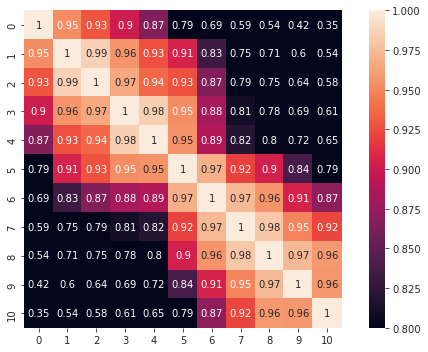

In [33]:
fig, ax = create_figure(1, 1, (8, 5))

sns.heatmap(
    sim_h,
    vmin=0.8,
    vmax=1.0,
    square=True,
    annot=True,
    fmt='.2g',
    ax=ax,
)
plt.show()

### Bold (mg)

In [34]:
pi_avg = {}
pi_all = {}
for kk in tqdm(range(4, 15)):
    props_bo['num_k'] = kk
    gr_bo = Group(**props_bo).fit_group()
    pi_bo = gr_bo.prune(thres=0.003, ci=0.95)['pi_prune']
    gr_bo.run_pi = pi_bo
    gr_bo._merge_vis(0.1)
    
    pi_all[kk] = gr_bo.run_pi
    pi_avg[f'bo-k{kk-1}\n(pr95-mg1)\nb={b}'.replace(' ', '')] = avg(gr_bo.run_pi)
    
# sort
d2p_bomg = pi_avg.copy()
for i in range(len(pi_avg)):
    lbl, x = list(pi_avg.items())[i]
    if i == 0:
        continue
    src = list(d2p_bomg.values())[i - 1]
    gmap = find_best_mappings(
        centroids=src,
        data={0: x},
        match_metric='cosine',
        global_order='infer',
    )[0]
    ids = list(gmap.values())
    ids = ids + list(np.delete(range(len(x)), ids))
    d2p_bomg[lbl] = x[ids]

  0%|          | 0/11 [00:00<?, ?it/s]

In [35]:
gr_bo.fit_meta

{
    'time_start': '2022_06_04_12-32',
    'min_runs_thresh': 0.75,
    'min_node_thresh': 0.85,
    'best_node_freq_q': 0.985,
    'num_total_runs': 114,
    'fraction_accepted_runs': 0.8859649122807017,
    'fraction_good_nodes': 0.8618421052631579,
    'time_end': '2022_06_04_12-46'
}

In [36]:
gr_bo.kw_kmeans

{'n_init': 100, 'max_iter': 300, 'tol': 0.0001}

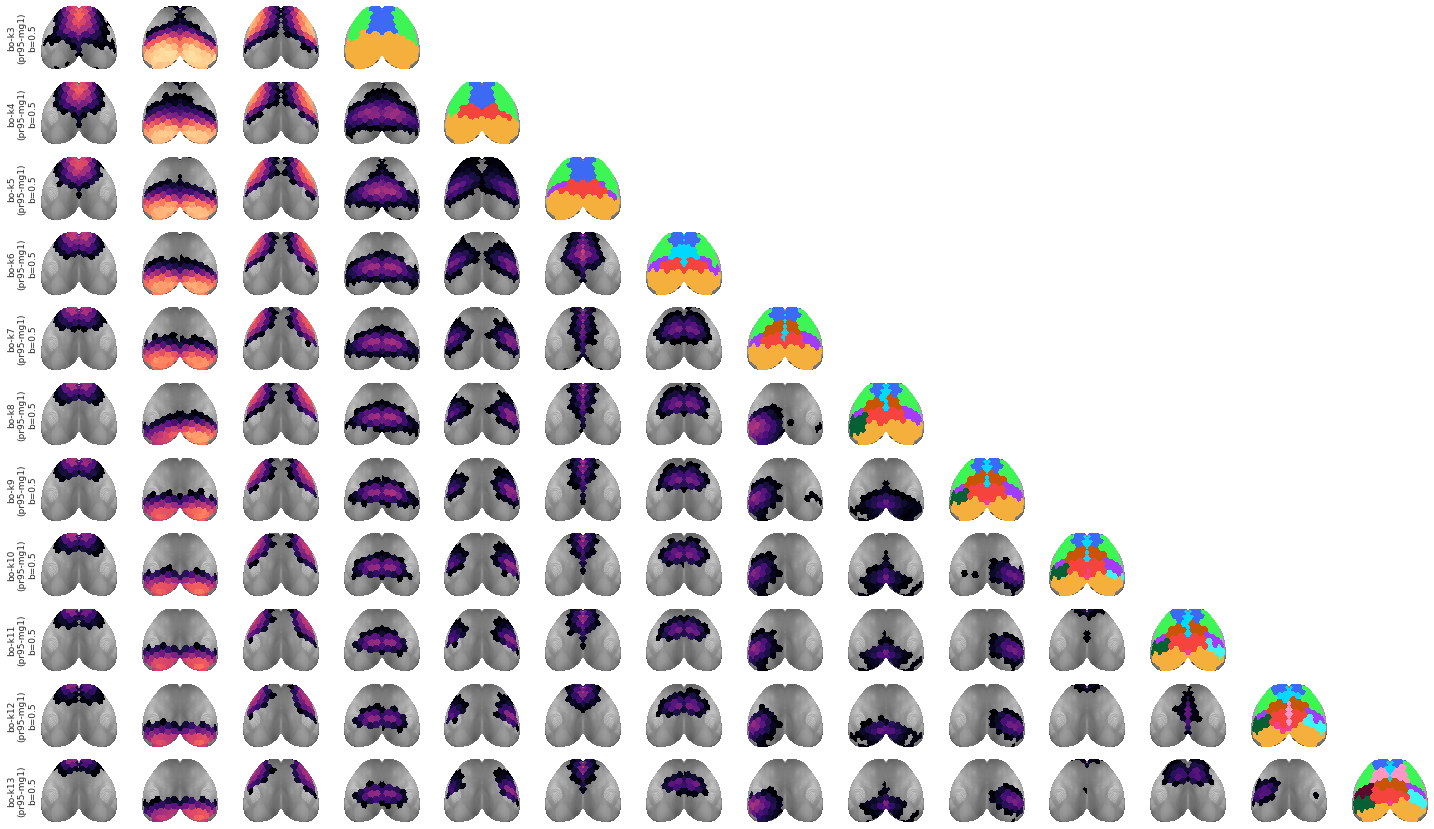

In [37]:
_ = gr_bo.show(d2p_bomg, figsize=(25, 15))

In [38]:
h_all = []
for kk, x in pi_all.items():
    h = sp_stats.entropy(bn.nanmean(x, -3), axis=-2) / np.log(x.shape[-2])
    h_all.append(np.expand_dims(h, 0))
h_all = np.concatenate(h_all)
h_avg = avg(h_all, 1, 1)

h_all.shape, h_avg.shape

((11, 10, 3, 4, 152), (11, 152))

In [39]:
np.nanmin(h_avg), np.nanmax(h_avg)

(0.1649115003293611, 0.8250522559447294)

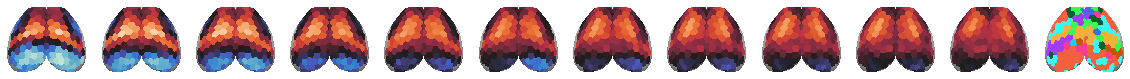

In [40]:
_ = gr_ca.show(
    h_avg,
    vmin=np.nanmin(h_avg),
    vmax=np.nanmax(h_avg),
    figsize=(20, 4),
    cmap='icefire',
)

In [41]:
sim_h = dist2sim(sp_dist.squareform(sp_dist.pdist(
    h_avg, metric='correlation')))

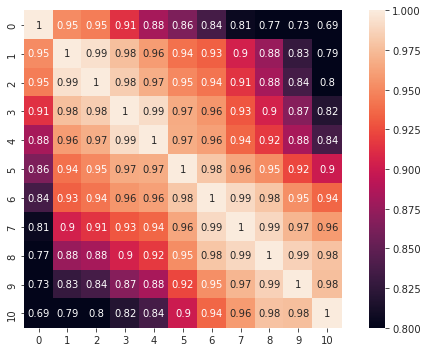

In [42]:
fig, ax = create_figure(1, 1, (8, 5))

sns.heatmap(
    sim_h,
    vmin=0.8,
    vmax=1.0,
    square=True,
    annot=True,
    fmt='.2g',
    ax=ax,
)
plt.show()

## Now put together

In [2]:
mice = Mice(128)

task = 'rest'
b = (0.01, 0.5)
mice.setup_func_data(task, band_ca=b)

num_k, p = None, 20
perc = f'p{p}-sample'
props_base = {
    'kw_kmeans': {'n_init': 100},
    'perc': perc,
    'num_k': num_k,
    'mice': mice,
    'task': task,
    'metric': 'pearson',
    'match_using': 'gam',
    'match_metric': 'euclidean',
    'graph_type': 'real',
    'verbose': False,
}
props_ca = {'mode': 'ca2', **props_base}
props_bo = {'mode': 'bold-lite', **props_base}

selected = [4, 7, 10, 14]

In [3]:
%%time

b = (0.01, 0.5)
mice.setup_func_data(task, band_ca=b)

pi_avg = {}
pi_all = {}
for kk in selected:
    props_ca['num_k'] = kk
    gr_ca = Group(**props_ca).fit_group()
    pi_ca = gr_ca.prune(thres=0.003, ci=0.95)['pi_prune']
    pi_all[kk] = pi_ca
    pi_avg[f'ca2-k{kk}(pr95)\nb={b}'.replace(' ', '')] = avg(pi_ca)

# sort
d2p_cas = pi_avg.copy()
for i in range(len(pi_avg)):
    lbl, x = list(pi_avg.items())[i]
    if i == 0:
        continue
    src = list(d2p_cas.values())[i - 1]
    gmap = find_best_mappings(
        centroids=src,
        data={0: x},
        match_metric='cosine',
        global_order='infer',
    )[0]
    ids = list(gmap.values())
    ids = ids + list(np.delete(range(len(x)), ids))
    d2p_cas[lbl] = x[ids]

CPU times: user 3h 1min 50s, sys: 4min 21s, total: 3h 6min 12s
Wall time: 5min 54s


In [4]:
%%time

b = 0.5
mice.setup_func_data(task, band_ca=b)

pi_avg = {}
pi_all = {}
for kk in selected:
    props_ca['num_k'] = kk
    gr_ca = Group(**props_ca).fit_group()
    pi_ca = gr_ca.prune(thres=0.003, ci=0.95)['pi_prune']
    pi_all[kk] = pi_ca
    pi_avg[f'ca2-k{kk}(pr95)\nb={b}'.replace(' ', '')] = avg(pi_ca)

# sort
d2p_caf = pi_avg.copy()
for i in range(len(pi_avg)):
    lbl, x = list(pi_avg.items())[i]
    if i == 0:
        continue
    src = list(d2p_caf.values())[i - 1]
    gmap = find_best_mappings(
        centroids=src,
        data={0: x},
        match_metric='cosine',
        global_order='infer',
    )[0]
    ids = list(gmap.values())
    ids = ids + list(np.delete(range(len(x)), ids))
    d2p_caf[lbl] = x[ids]

CPU times: user 2h 18min 10s, sys: 3min 25s, total: 2h 21min 35s
Wall time: 4min 35s


In [5]:
pi_avg = {}
pi_all = {}
for kk in selected:
    props_bo['num_k'] = kk + 1 if kk < 10 else kk
    gr_bo = Group(**props_bo).fit_group()
    pi_bo = gr_bo.prune(thres=0.003, ci=0.95)['pi_prune']
    gr_bo.run_pi = pi_bo
    if kk < 10:
        gr_bo._merge_vis(0.15)
    pi_all[kk] = gr_bo.run_pi
    pi_avg[f'bo-k{gr_bo.num_k}\n(pr95-mg1)\nb={b}'.replace(' ', '')] = avg(gr_bo.run_pi)
    
# sort
d2p_bomg = pi_avg.copy()
for i in range(len(pi_avg)):
    lbl, x = list(pi_avg.items())[i]
    if i == 0:
        continue
    src = list(d2p_bomg.values())[i - 1]
    gmap = find_best_mappings(
        centroids=src,
        data={0: x},
        match_metric='cosine',
        global_order='infer',
    )[0]
    ids = list(gmap.values())
    ids = ids + list(np.delete(range(len(x)), ids))
    d2p_bomg[lbl] = x[ids]

### Quickly show

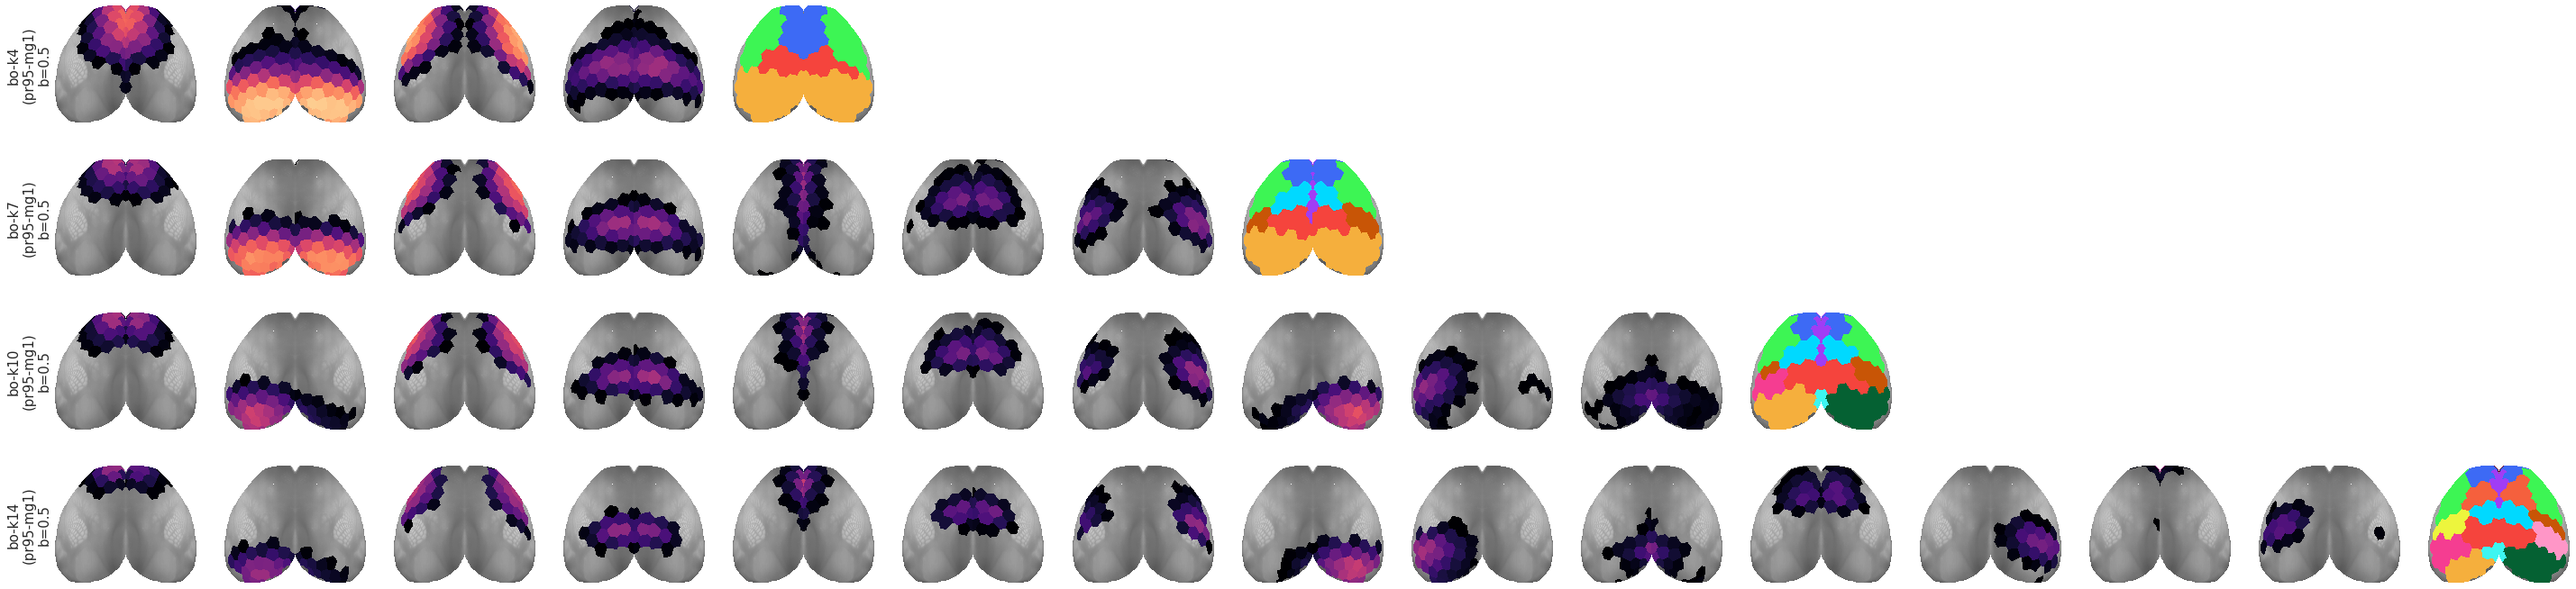

In [6]:
_ = gr_bo.show(d2p_bomg, figsize=(50, 12), ylabel_fontsize=15)

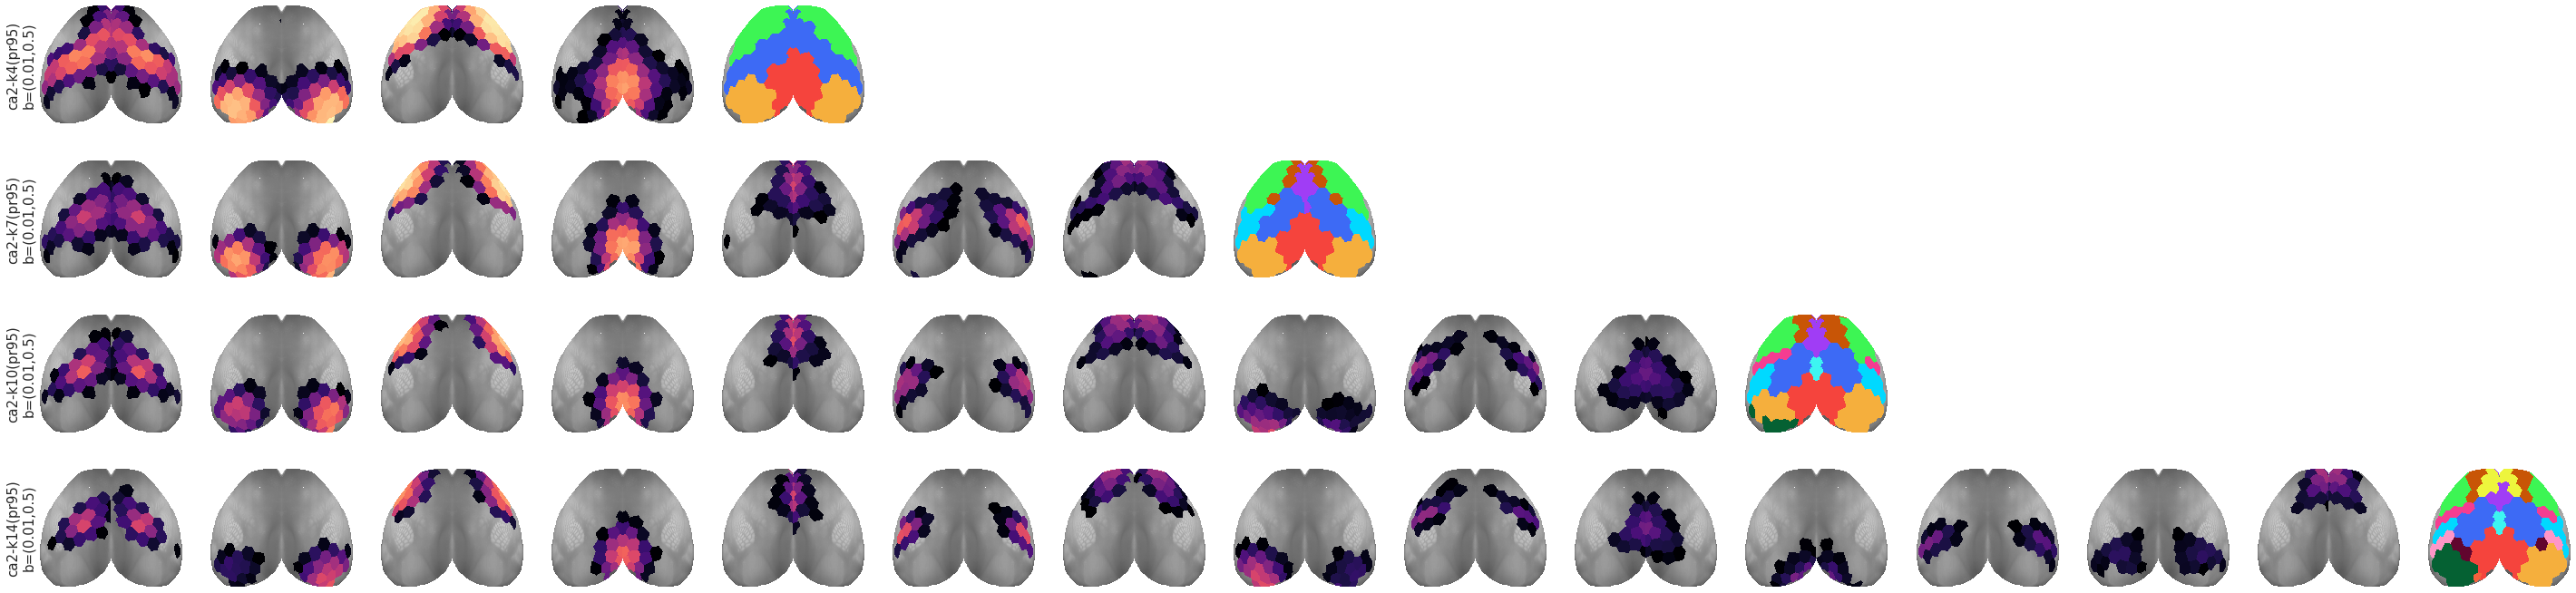

In [7]:
_ = gr_bo.show(d2p_cas, figsize=(50, 12), ylabel_fontsize=15)

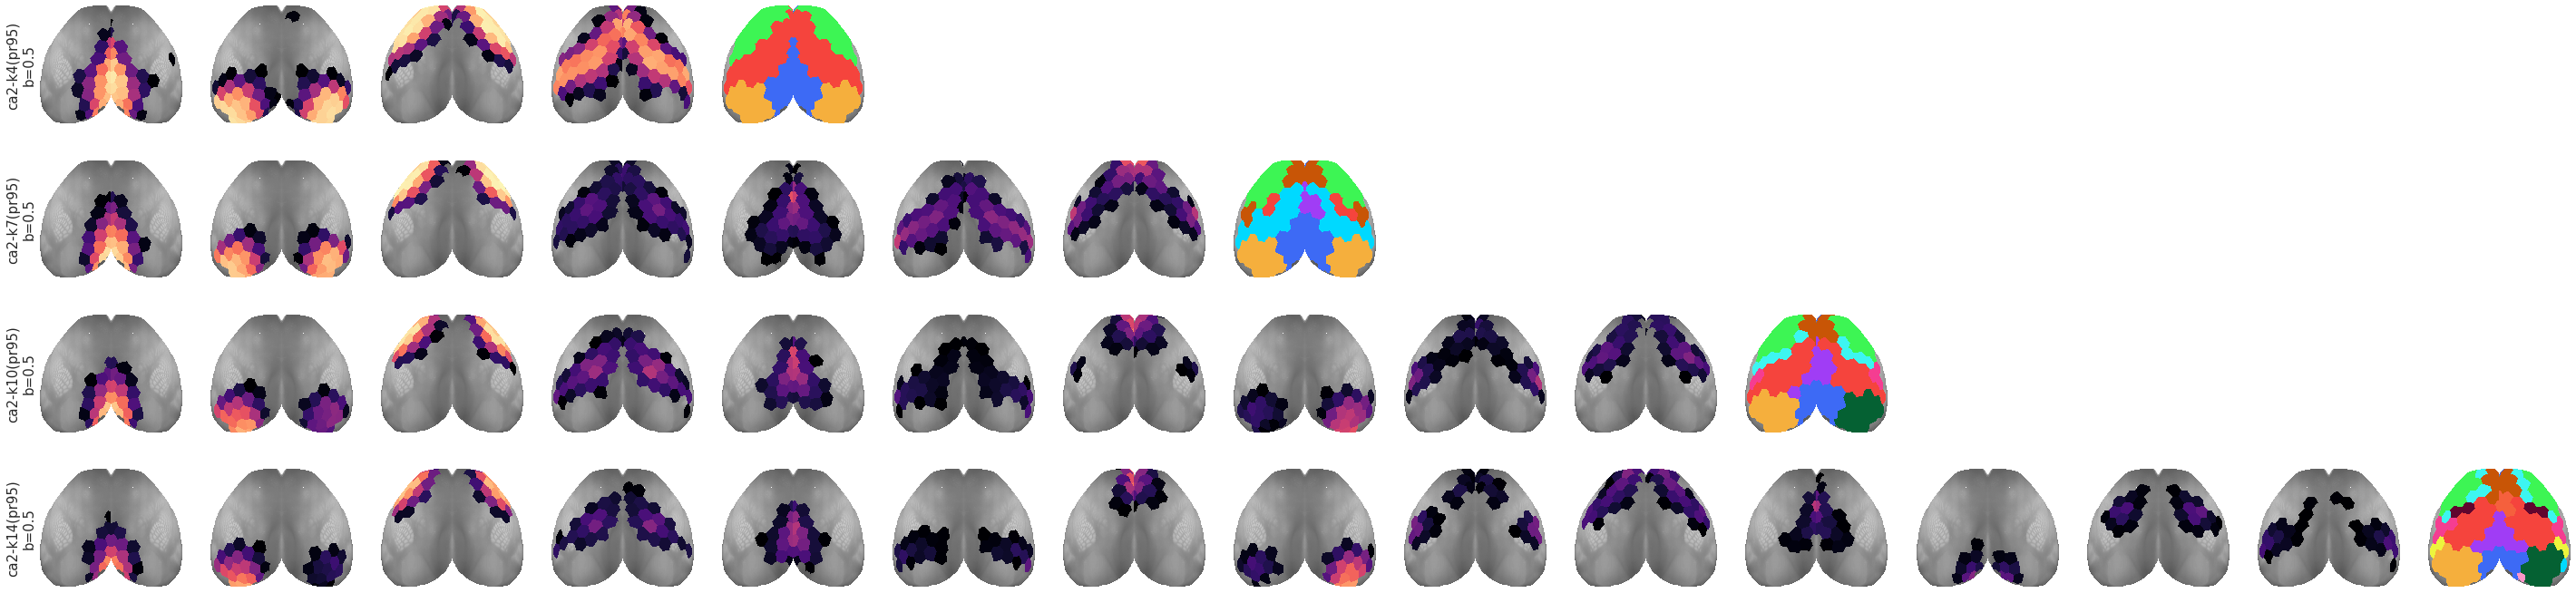

In [8]:
_ = gr_bo.show(d2p_caf, figsize=(50, 12), ylabel_fontsize=15)

### Align final

In [9]:
d2p = {}
for kk in selected:
    lbl_src, src = next((lbl, x) for lbl, x in d2p_bomg.items() if f"k{kk}" in lbl)
    d2p[lbl_src] = src
    
    lbl_s, tgt_s = next((lbl, x) for lbl, x in d2p_cas.items() if f"k{kk}" in lbl)
    gmap = find_best_mappings(
        centroids=src,
        data={lbl_s: tgt_s},
        match_metric='cosine',
        global_order='infer',
    )[lbl_s]
    d2p[lbl_s] = tgt_s[list(gmap.values())]
    
    lbl_f, tgt_f = next((lbl, x) for lbl, x in d2p_caf.items() if f"k{kk}" in lbl)
    gmap = find_best_mappings(
        centroids=d2p[lbl_s],
        data={lbl_f: tgt_f},
        match_metric='cosine',
        global_order='infer',
    )[lbl_f]
    d2p[lbl_f] = tgt_f[list(gmap.values())]

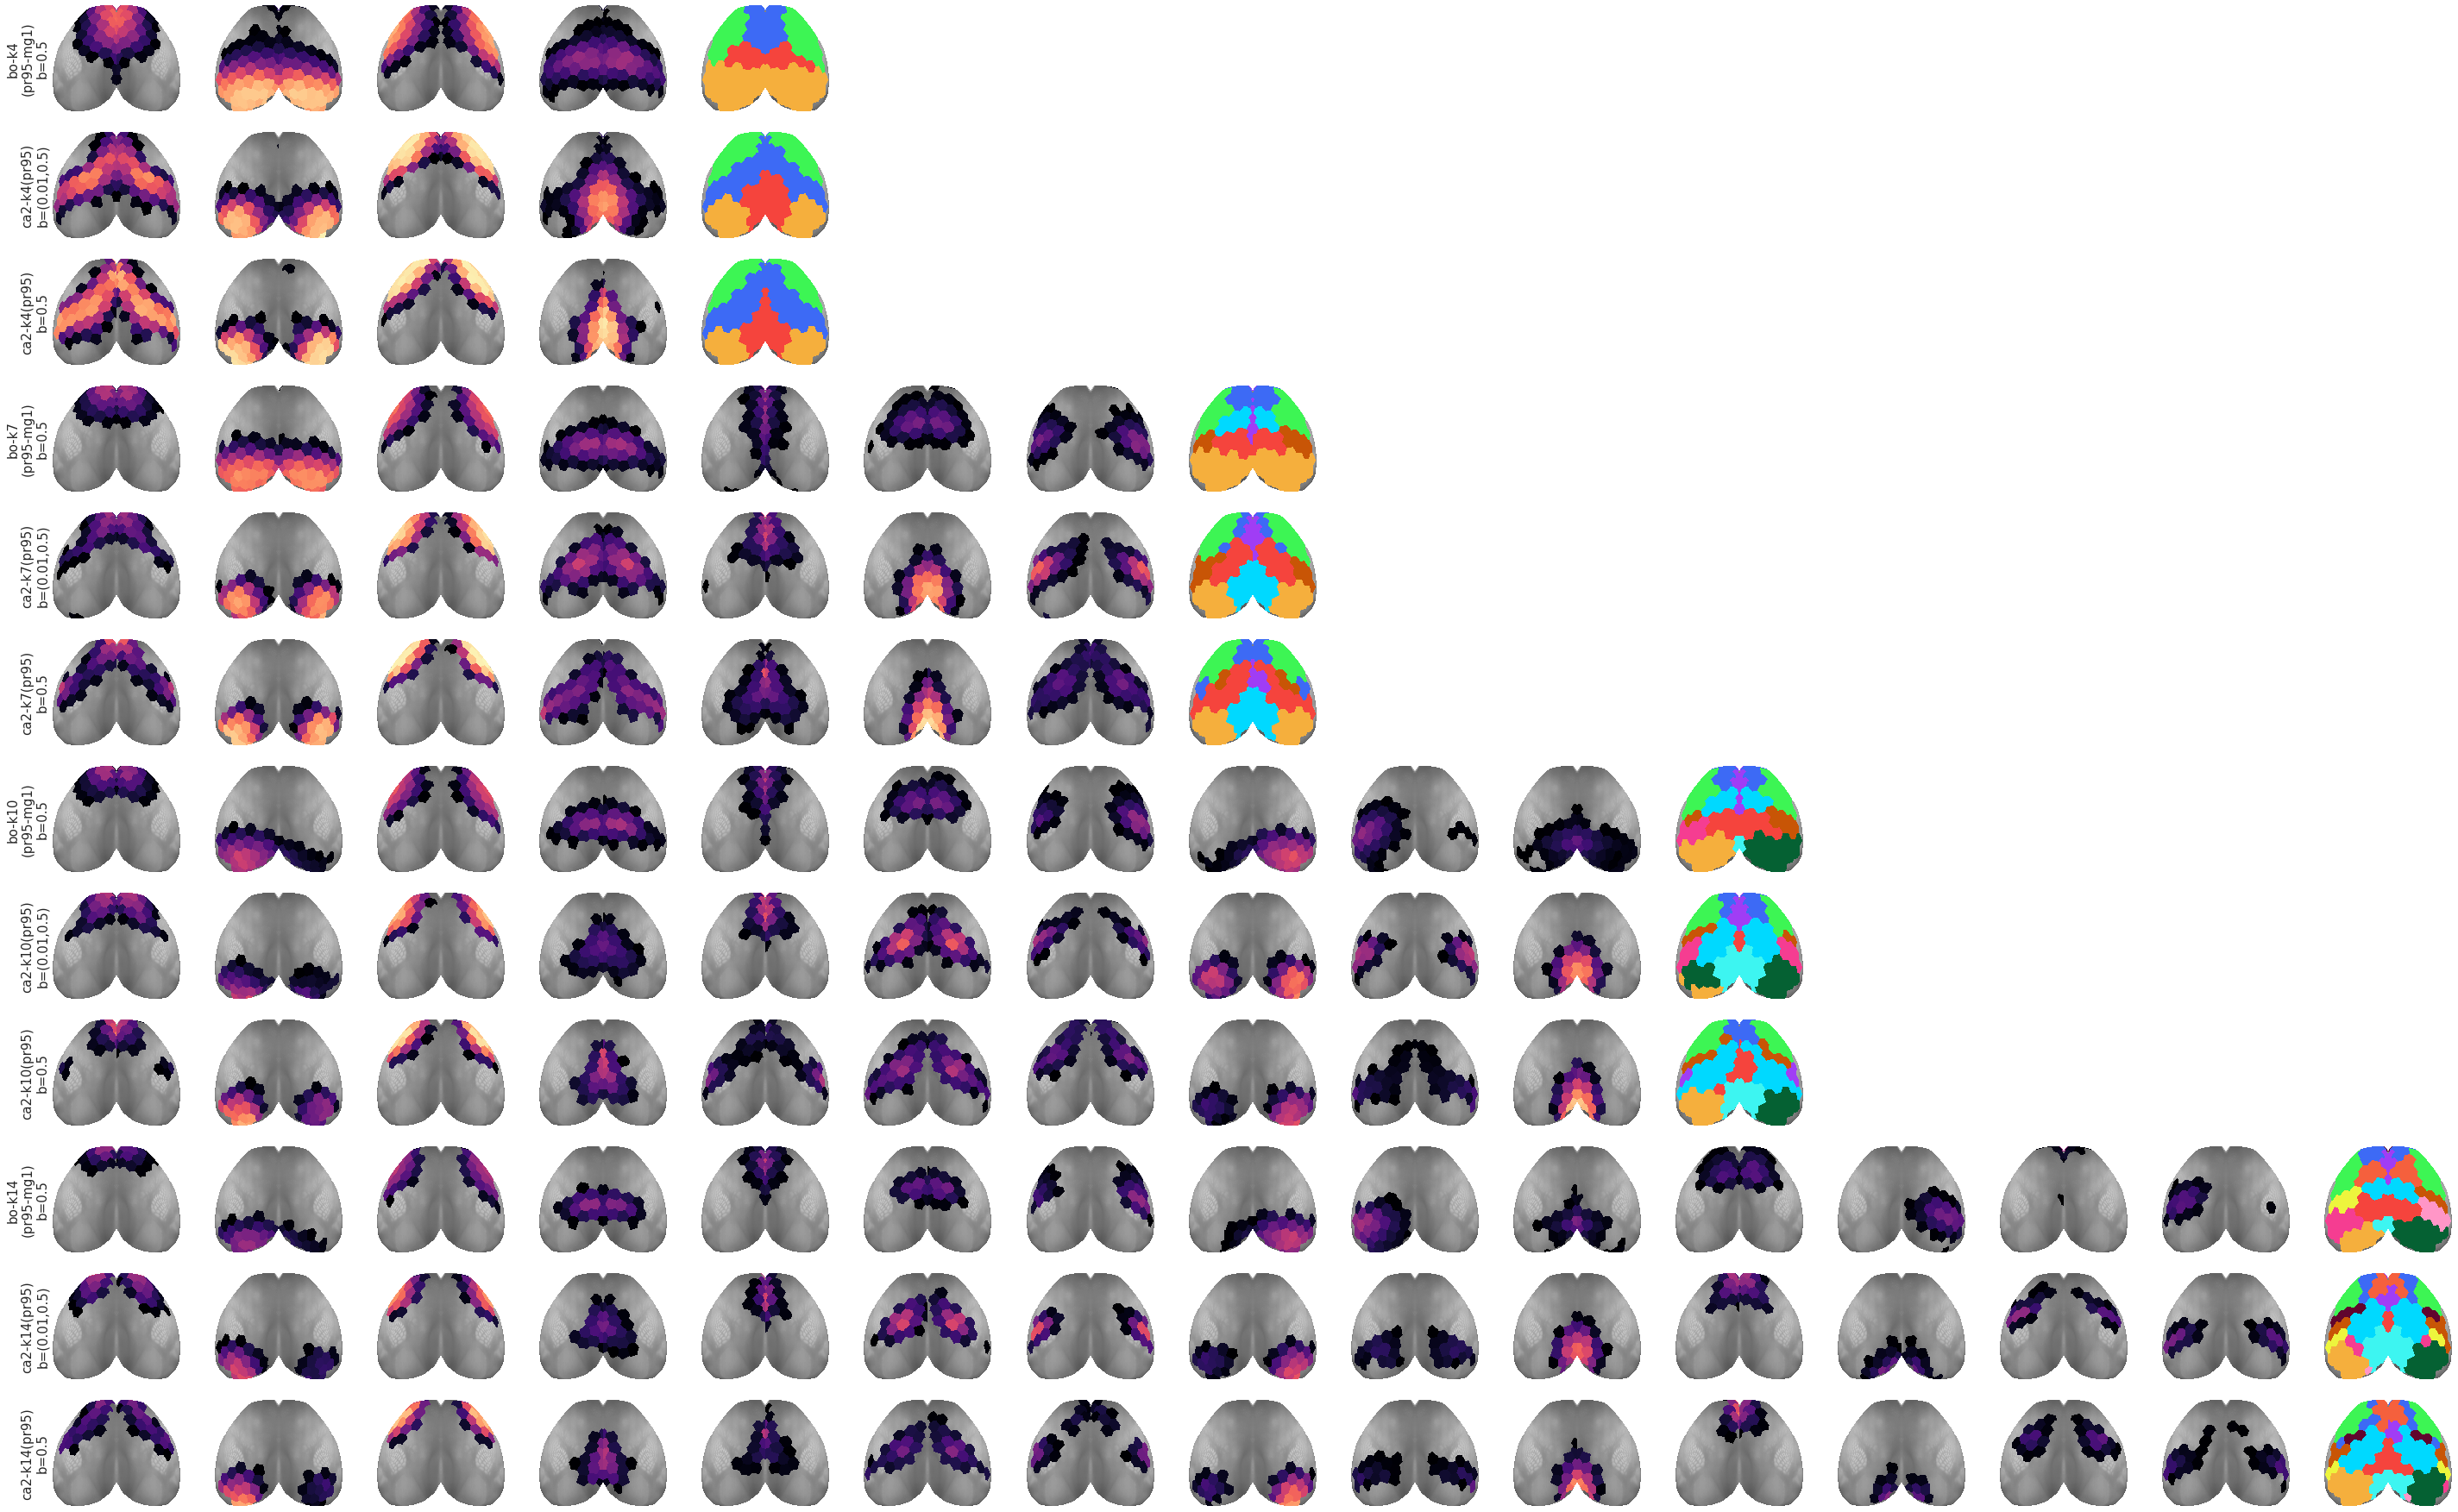

In [10]:
_ = gr_bo.show(d2p, figsize=(50, 32), ylabel_fontsize=15)